In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("Desktop/Data/adult.csv" , na_values = ["#NAME?"])

In [44]:
df = df.sample(frac = 0.1, random_state = 1)
print(df.shape)

(4884, 15)


In [45]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
391,31,Private,224234,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States,<=50K
1899,25,Private,149486,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Male,0,0,40,United-States,<=50K
24506,36,Self-emp-not-inc,343721,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,?,>50K
32816,26,?,131777,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,2002,40,United-States,<=50K
47892,30,Local-gov,44566,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [46]:
print(df['income'].value_counts())

<=50K    3688
>50K     1196
Name: income, dtype: int64


In [47]:
df['income'] = [0 if x == "<=50K" else 1 for x in df['income']]

In [48]:
df["income"].unique()

array([0, 1], dtype=int64)

In [49]:
X = df.drop('income' , 1)
y = df.income

In [50]:
Fraud = df[df["income"] == 1]
Valid = df[df["income"] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print("Fraud Case: {}".format(len(Fraud)))
print("Valid Case: {}".format(len(Valid)))

0.324295010845987
Fraud Case: 1196
Valid Case: 3688


In [51]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
391,31,Private,224234,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States
1899,25,Private,149486,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Male,0,0,40,United-States
24506,36,Self-emp-not-inc,343721,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,?
32816,26,?,131777,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,2002,40,United-States
47892,30,Local-gov,44566,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [52]:
y.head()

391      0
1899     0
24506    1
32816    0
47892    0
Name: income, dtype: int64

In [53]:
X["education"].unique()

array(['HS-grad', 'Doctorate', 'Bachelors', 'Some-college', '12th',
       '7th-8th', 'Prof-school', '9th', 'Assoc-acdm', '11th', '10th',
       'Masters', 'Assoc-voc', '1st-4th', 'Preschool', '5th-6th'],
      dtype=object)

In [54]:
print(pd.get_dummies(X["education"]).head())

       10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
391       0     0     0        0        0        0    0           0   
1899      0     0     0        0        0        0    0           0   
24506     0     0     0        0        0        0    0           0   
32816     0     0     0        0        0        0    0           0   
47892     0     0     0        0        0        0    0           0   

       Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
391            0          0          0        1        0          0   
1899           0          0          0        1        0          0   
24506          0          0          1        0        0          0   
32816          0          1          0        0        0          0   
47892          0          1          0        0        0          0   

       Prof-school  Some-college  
391              0             0  
1899             0             0  
24506            0             0  
32816 

In [55]:
for col_name in X.columns:
    if X[col_name].dtypes == "object":
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(
        col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has '9' unique categories
Feature 'education' has '16' unique categories
Feature 'marital-status' has '7' unique categories
Feature 'occupation' has '15' unique categories
Feature 'relationship' has '6' unique categories
Feature 'race' has '5' unique categories
Feature 'gender' has '2' unique categories
Feature 'native-country' has '40' unique categories


In [56]:
print(X['native-country'].value_counts().sort_values(ascending = False).head(10))

United-States    4400
?                  82
Mexico             77
Philippines        28
Vietnam            23
Puerto-Rico        22
Germany            20
India              19
South              16
Cuba               16
Name: native-country, dtype: int64


In [57]:
X['native-country'] = ['United-States' if x == 'United-States' else 'other' for x in X['native-country']]
print(X['native-country'].value_counts().sort_values(ascending = False))

United-States    4400
other             484
Name: native-country, dtype: int64


In [58]:
todummy_list = ['workclass','education', 'marital-status','occupation', 'relationship',
               'race', 'gender','native-country']

In [59]:
def dummy_df (df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis = 1)
    return df
    

In [60]:
X = dummy_df (X, todummy_list)
X.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_United-States,native-country_other
391,31,224234,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1899,25,149486,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
24506,36,343721,16,0,0,30,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32816,26,131777,13,0,2002,40,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
47892,30,44566,13,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
21561,39,141420,10,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
808,44,165745,9,0,0,38,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
19596,68,75913,8,0,0,30,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
931,35,165799,13,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
29559,64,231619,9,0,0,21,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0


In [61]:
X.isnull().sum().sort_values(ascending = False).head()

native-country_other    0
education_Bachelors     0
education_1st-4th       0
education_5th-6th       0
education_7th-8th       0
dtype: int64

In [62]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = "NaN", strategy = "median", axis = 0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

In [63]:
def find_outliere_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    IQR = q3 - q1
    floor = q1 - 1.5*IQR
    ceiling = q3 + 1.5*IQR
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [64]:
tukey_indices, tukey_values = find_outliere_tukey(X["age"])
print(np.sort(tukey_values))

[79. 79. 80. 80. 81. 81. 82. 82. 83. 83. 83. 84. 84. 87. 88. 90. 90. 90.
 90. 90. 90. 90.]


In [65]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw = "scott", fft = True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [66]:
kde_indices, kde_values = find_outliers_kde(X["age"])
print((np.sort(kde_values)))

[70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 71. 71. 71. 71. 71. 71.
 71. 71. 71. 71. 71. 71. 71. 71. 71. 72. 72. 72. 72. 72. 72. 72. 72. 72.
 72. 73. 73. 73. 73. 73. 73. 73. 73. 73. 74. 74. 74. 74. 74. 74. 74. 74.
 74. 74. 74. 74. 74. 74. 75. 75. 75. 75. 75. 75. 76. 76. 76. 76. 76. 77.
 77. 77. 77. 78. 78. 78. 78. 78. 79. 79. 80. 80. 81. 81. 82. 82. 83. 83.
 83. 84. 84. 87. 88. 90. 90. 90. 90. 90. 90. 90.]


In [67]:
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x , color = "gray", alpha = 0.5)
    plt.title("Histogram of '{var_name}'".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

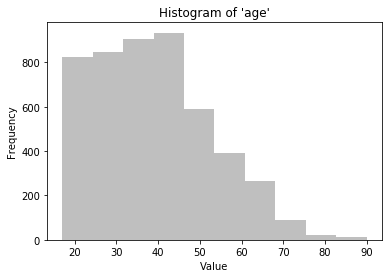

In [68]:
plot_histogram(X["age"])

In [69]:
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha = 0.5, label = "DV=0")
    plt.hist(list(x[y==1]), alpha = 0.5, label = "DV=1")
    plt.title("Histogram of '{var_name}' by DV Category".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc = "upper right")
    plt.show()

In [70]:
plot_histogram_dv(X["age"],y)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [71]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    poly = PolynomialFeatures(interaction_only= True, include_bias = False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis = 1)
    
    return df

In [72]:
X = add_interactions(X)
print(X.head(5))

    age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  31.0  224234.0              9.0           0.0           0.0   
1  25.0  149486.0              9.0           0.0           0.0   
2  36.0  343721.0             16.0           0.0           0.0   
3  26.0  131777.0             13.0           0.0        2002.0   
4  30.0   44566.0             13.0           0.0           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            40.0          0.0                    0.0                  0.0   
1            40.0          0.0                    0.0                  0.0   
2            30.0          0.0                    0.0                  0.0   
3            40.0          1.0                    0.0                  0.0   
4            40.0          0.0                    0.0                  1.0   

   workclass_Never-worked                ...                 \
0                     0.0                ...                  
1       

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pd.DataFrame(pca.fit_transform(X))
print(X_pca.head(5))

              0             1             2             3             4  \
0 -2.146057e+08 -1.832180e+07  9.979275e+05 -1.155051e+06 -1.730581e+04   
1 -2.146074e+08 -1.836483e+07 -3.436808e+06 -1.421330e+06 -4.971371e+04   
2 -2.146037e+08 -1.827160e+07  6.171617e+06  1.746768e+06  2.829638e+06   
3 -2.150101e+08  2.454336e+08 -6.666458e+06 -1.089142e+06  3.627441e+05   
4 -2.146092e+08 -1.841145e+07 -8.197412e+06 -2.651443e+05 -6.776835e+04   

              5              6              7              8              9  
0 -22870.830349   93326.600537  223013.607104    3017.346083  281335.504485  
1 -34446.536953   41820.593455   86606.548093   21816.789141  183176.772806  
2  69896.260800   22636.644350  -64125.451463 -458638.924520    9501.922334  
3 -18909.276396 -154236.780201  -62953.876101  -37130.436903   61919.413122  
4 -45979.906258  -97203.372736  -57501.793542  -32118.103447   17194.867847  


In [74]:
print(df.shape)
print(X.shape)

(4884, 15)
(4884, 1730)


In [75]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k = 20)
selected_features = select.fit(X, y)
indices_selected = selected_features.get_support(indices = True)
colnames_selected = [X.columns[i] for i in indices_selected]

X = X[colnames_selected]

In [76]:
colnames_selected

['educational-num',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age_educational-num',
 'age_marital-status_Married-civ-spouse',
 'age_relationship_Husband',
 'fnlwgt_marital-status_Married-civ-spouse',
 'fnlwgt_relationship_Husband',
 'educational-num_hours-per-week',
 'educational-num_marital-status_Married-civ-spouse',
 'educational-num_relationship_Husband',
 'hours-per-week_marital-status_Married-civ-spouse',
 'hours-per-week_relationship_Husband',
 'marital-status_Married-civ-spouse_relationship_Husband',
 'marital-status_Married-civ-spouse_race_White',
 'marital-status_Married-civ-spouse_gender_Male',
 'marital-status_Married-civ-spouse_native-country_United-States',
 'relationship_Husband_race_White',
 'relationship_Husband_gender_Male',
 'relationship_Husband_native-country_United-States']

In [77]:
print(X.shape)
print(y.shape)

(4884, 20)
(4884,)


In [78]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor":LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
} 


In [80]:
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate (classifiers.items()):
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    print('{}:{}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest:1686
0.6547911547911548
             precision    recall  f1-score   support

          0       0.80      0.72      0.76      3688
          1       0.35      0.46      0.39      1196

avg / total       0.69      0.65      0.67      4884

Local Outlier Factor:2106
0.5687960687960688
             precision    recall  f1-score   support

          0       0.74      0.66      0.70      3688
          1       0.21      0.28      0.24      1196

avg / total       0.61      0.57      0.59      4884

